In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


# ABOUT DATA PROBLEM :: 


Credit scoring is a widely used risk management technique in the financial sector. It makes use of personal information and data provided by credit card applicants to estimate future bankruptcies and credit card loans. The bank has the authority to determine whether or not to provide the applicant a credit card. Credit scores can estimate the level of risk objectively.

A machine learning model is required to predict if an application is a 'good' or 'bad' user in this dataset. However, there is no definition of 'good' or 'bad'. Additionally, the unbalanced data problem is a significant issue in this project.

There are 2 datasets will be used in this notebook:

**Application record (contains general information about applicant, such as applicant gender, DOB, education type, assets that applicant had, etc.)**

**Credit record (contains applicant's loan payment records)**

# Reading & Analyzing Data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
df_credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [4]:
print("Shape of application data",df_application.shape)
print("-------------------------------------------")
print("Shape of credit data",df_credit.shape)

Shape of application data (438557, 18)
-------------------------------------------
Shape of credit data (1048575, 3)


In [5]:
print("Columns of application data",df_application.columns)
print("-------------------------------------------")
print("Columns of credit data",df_credit.columns)

Columns of application data Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
-------------------------------------------
Columns of credit data Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [6]:
print("data type of application data",df_application.dtypes)
print("-------------------------------------------")
print("data type of credit data",df_credit.dtypes)

data type of application data ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object
-------------------------------------------
data type of credit data ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


In [7]:
print("columns in application data")
print("--------------------------------------------------------------------------------")
cat_app_data = [i for i in df_application.select_dtypes(include=np.object).columns]
num_app_data = [i for i in df_application.select_dtypes(include=np.number).columns]
print("categorical columns in application data",cat_app_data)
print("--------------------------------------------------------------------------------")
print("numerical columns in application data",num_app_data)

columns in application data
--------------------------------------------------------------------------------
categorical columns in application data ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
--------------------------------------------------------------------------------
numerical columns in application data ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS']


In [8]:
print("columns in credit data")
print("--------------------------------------------------------------------------------")
cat_credit_data = [i for i in df_credit.select_dtypes(include=np.object).columns]
num_credit_data = [i for i in df_credit.select_dtypes(include=np.number).columns]
print("categorical columns in application data",cat_credit_data)
print("--------------------------------------------------------------------------------")
print("numerical columns in application data",num_credit_data)

columns in credit data
--------------------------------------------------------------------------------
categorical columns in application data ['STATUS']
--------------------------------------------------------------------------------
numerical columns in application data ['ID', 'MONTHS_BALANCE']


In [9]:
df_application.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
23123,5067607,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15515,-2485,1,0,0,1,Sales staff,2.0
7732,5028980,F,Y,Y,3,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11363,-721,1,0,1,0,High skill tech staff,5.0
222398,5975721,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20549,365243,1,0,0,0,NaN,2.0
121783,5548559,F,N,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-11159,-860,1,0,0,0,Core staff,3.0
187571,5864328,F,Y,N,0,54000.0,Working,Secondary / secondary special,Married,House / apartment,-19879,-391,1,1,1,0,Accountants,2.0


In [10]:
df_credit.sample(5)

,ID,MONTHS_BALANCE,STATUS
297458,5028447,-35,C
784814,5113758,-7,1
221250,5018496,-34,0
215077,5018186,-16,C
956171,5137035,-29,0


In [11]:
df_final = pd.merge(df_application, df_credit, on='ID', how='inner')

In [12]:
df_final.shape

(777715, 20)

In [13]:
df_final.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [14]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


The current data file does not have credit card open date. Based on MONTHS_BALANCE, we will find the start month for each of the applicant. Then rearrange the data so that the status is available for month 0 (start month), month 1 (month 1 from the start) and so on.

We assume for the data the earliest MONTHS_BALANCE is the start month for an account. So, we aim to change the as per the below diagram

In [15]:
# Earliest Month
credit_card_first_month =df_final.groupby(['ID']).agg(
   start_month=  ('MONTHS_BALANCE', min)
    ).reset_index()
credit_card_first_month.head()

,ID,start_month
0,5008804,-15
1,5008805,-14
2,5008806,-29
3,5008808,-4
4,5008809,-26


We assume that the data were extracted as of 1-Jan-2020 and we are working on finding the calendar start month for each of the accounts. It may be useful to have the calendar account open date for a few analyses.

In [16]:
import datetime
credit_card_first_month['account_open_month']= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
credit_card_first_month['account_open_month']= credit_card_first_month['account_open_month'] + credit_card_first_month['start_month'].values.astype("timedelta64[M]")
credit_card_first_month['account_open_month']=credit_card_first_month['account_open_month'].dt.strftime('%b-%Y')

In [17]:
credit_card_first_month.head()

,ID,start_month,account_open_month
0,5008804,-15,Oct-2018
1,5008805,-14,Nov-2018
2,5008806,-29,Jul-2017
3,5008808,-4,Sep-2019
4,5008809,-26,Oct-2017


Account 5008804 has been opened in Oct-2018 and the account 5008805 was opened in Nov-2018. We need to add the start month column to the credit status (credit_status) table.

In [18]:
# join the table
credit_start_status = pd.merge(credit_card_first_month, df_credit, how='left', on=['ID'])

credit_start_status['start_month']=abs(credit_start_status['start_month'])+credit_start_status['MONTHS_BALANCE']

In [19]:
credit_start_status.head()

,ID,start_month,account_open_month,MONTHS_BALANCE,STATUS
0,5008804,15,Oct-2018,0,C
1,5008804,14,Oct-2018,-1,C
2,5008804,13,Oct-2018,-2,C
3,5008804,12,Oct-2018,-3,C
4,5008804,11,Oct-2018,-4,C


You can see the status by month since the start (start_month) and the relevance of what we have done.

Across all the acquisition months, now we can find portfolio performance across month 1, 2,5, 15, 20 months from their respective account open month. Distribution of account by the status across each of the months is calculated. First, we need to find the accounts by month and status code.

In [20]:
credit_start_status['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

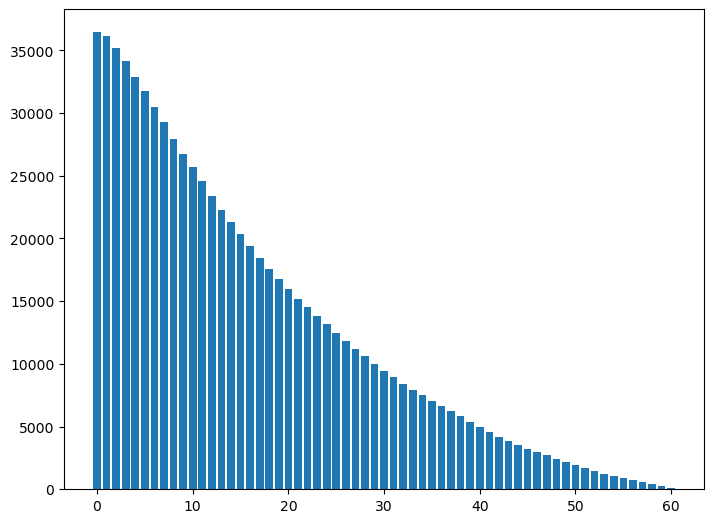

In [21]:
accounts_counts =pd.DataFrame({'start_month':credit_start_status.groupby('start_month')['start_month'].count()})
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accounts_counts.index,accounts_counts['start_month'])
plt.show()

We want to calculate % Bad Rate for the overall portfolio - across all the account open months. This will help us find the period by which the overall bad rate is stable.

Another important observation is that only a small volume of credit card accounts was opened in the early months. These accounts may not be relevant to consider for the modeling. We can check the Bad Rate distribution for these accounts.

In [22]:
month_status_counts = credit_start_status.groupby(['start_month', 'STATUS']).size().reset_index(name='counts')
month_counts = credit_start_status.groupby(['start_month']).size().reset_index(name='month_counts')
# join the table
month_status_pct = pd.merge(month_status_counts, month_counts, how='left', on=['start_month'])
month_status_pct['status_pct']=month_status_pct['counts']/month_status_pct['month_counts']*100
month_status_pct= month_status_pct.loc[:,['start_month','STATUS','status_pct']]

In [23]:
# Restucture
month_status_pct1 = month_status_pct.pivot(index='start_month', columns='STATUS', values='status_pct')
# Fill with 0
month_status_pct1=month_status_pct1.fillna(0).reset_index()

Text(0, 0.5, '% Bad Rate')

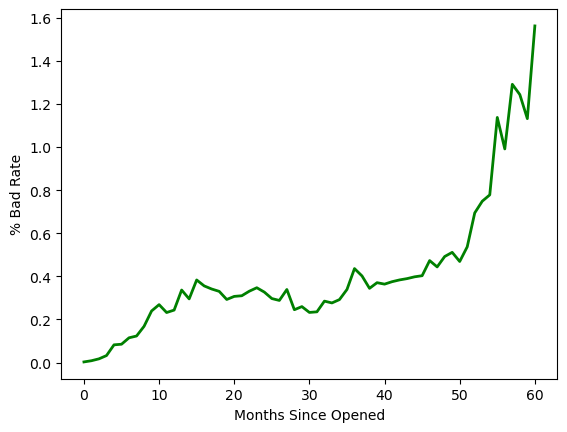

In [24]:
import matplotlib.pyplot as pt
pt.plot(month_status_pct1.index, month_status_pct1['4']+month_status_pct1['5'],
     color='green', 
     linestyle='solid',
     linewidth=2, 
     markersize=12)
pt.xlabel('Months Since Opened')
pt.ylabel('% Bad Rate')

Bad Rate jump significantly for the accounts which are opened for over 50 months. There are the accounts that were opened for the initial days of the operations. It may not be a bad idea to exclude these accounts

In [25]:
month_status_pct2 = month_status_pct1.loc[month_status_pct1.index<=50]
# drop column start_month
month_status_pct2=month_status_pct2.drop('start_month', axis=1)

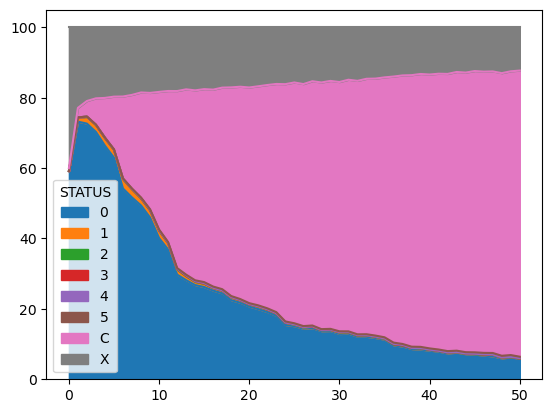

In [26]:
import matplotlib.pyplot as plot
month_status_pct2.plot.area(stacked=True);
plot.show(block=True);

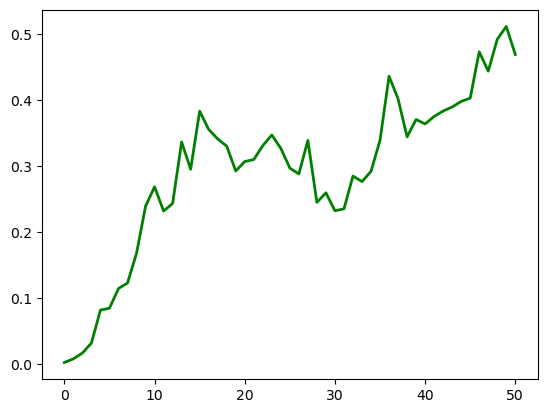

In [27]:
import matplotlib.pyplot as pt
pt.plot(month_status_pct2.index, month_status_pct2['4']+month_status_pct2['5'],
     color='green', 
     linestyle='solid',
     linewidth=2, 
     markersize=12)

The bad rate is almost settled after 18 months from the start, we may decide to consider it as a performance window. Any of the accounts which become bad in the first 18 months, will be termed as Bad and rest as Good.

There may be a difference in performance - Bad rate % by acquisition month. But we are not it exploring that further. Based on status 4 and 5 in the first 18 months, we will term as Bad and otherwise Good.

We will select start months less than 18 (so only the first 18 months are considered) and find max status for each of the credit card account. If the status is 4 or 5, we can call Bad otherwise Good.

In [28]:
df_credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [29]:
credit_start_status.groupby('STATUS')['STATUS'].count()

STATUS
0    290654
1      8747
2       801
3       286
4       214
5      1527
C    329536
X    145950
Name: STATUS, dtype: int64

In [30]:
credit_start_status1 = credit_start_status.loc[(df_credit['STATUS'] !='X') & (df_credit['STATUS'] !='C') ,:]


In [31]:
credit_start_status1['status'] = credit_start_status1['STATUS']


In [32]:
credit_start_status1 = credit_start_status1.loc[credit_start_status1['start_month']<=18,['ID','start_month','status']]

In [33]:
credit_start_status1 = credit_start_status1[(credit_start_status1['status']!='C')]

In [34]:
credit_start_status1 = credit_start_status1[(credit_start_status1['status']!='X')]

In [35]:
credit_start_status1

,ID,start_month,status
13,5008804,2,1
14,5008804,1,0
126,5008811,10,0
128,5008811,8,0
130,5008811,6,0
...,...,...,...
777674,5150484,8,0
777675,5150484,7,0
777676,5150484,6,0
777677,5150484,5,0


In [36]:
# Find Max Status Values
status = credit_start_status1.groupby(['ID']).agg(
    # Max Status
    max_status=('status','max')

    ).reset_index()
# Validate
status.groupby('max_status')['max_status'].count()

max_status
0    16259
1     1548
2      121
3       40
4       16
5       70
Name: max_status, dtype: int64

In [37]:
import numpy as np
# Define 
status['label']=np.where(status['max_status'].astype(int)>=int(4), 1,0)
# Validate
status.groupby('label')['label'].count()

label
0    17968
1       86
Name: label, dtype: int64

The data is highly unbalanced - with a bad rate of 0.47%. We can create a biased sample. Taking all observations of Label 1 but small % of observations from label 0. We may want to improve the bad rate to say 10%. So, in the final sample, we will 86 for label 1 and 17968 for label 0.



In [38]:
status.groupby('label')['label'].count()*100/len(status['label'])

label
0    99.523651
1     0.476349
Name: label, dtype: float64

The data is highly unbalanced - with a bad rate of 0.47%. We can create a biased sample. Taking all observations of Label 1 but small % of observations from label 0. We may want to improve the bad rate to say 10%. So, in the final sample, we will 189 for label 1 and 1701 for label 0.

Now we want to select randomly 1701 observations from 39562.

In [39]:
# All with label 1
label_1 = status.loc[status['label']==1,:]
# All with label 0
label_0 = status.loc[status['label']==0,:]
# Select randomly few rows
label_0_biased=label_0.sample(n = 1701) 
# Combined Sample IDs with Biased Sampling

frames = [label_1,label_0_biased]
import pandas as pd
labels_biased = pd.concat(frames)

# Keep only ID and Label Columns

labels_biased=labels_biased.loc[:,['ID','label']]

In [40]:
labels_biased


,ID,label
343,5009744,1
345,5009746,1
346,5009749,1
347,5009752,1
348,5009753,1
...,...,...
6209,5054101,0
16064,5136880,0
2745,5028468,0
5933,5053387,0


In [41]:
# Combine Labels and Application Data
model_df = pd.merge (labels_biased, df_application,how='inner',on=['ID'] )
len(model_df)

1787

In [42]:
model_df.tail()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1782,5054101,0,M,Y,N,2,202500.0,Working,Higher education,Married,House / apartment,-11736,-727,1,0,0,0,Drivers,4.0
1783,5136880,0,F,Y,N,0,360000.0,Working,Higher education,Married,House / apartment,-9909,-747,1,0,0,0,Managers,2.0
1784,5028468,0,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12406,-265,1,0,0,1,Drivers,4.0
1785,5053387,0,M,Y,Y,2,247500.0,Working,Incomplete higher,Married,House / apartment,-13102,-962,1,0,0,0,Drivers,4.0
1786,5054638,0,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13542,-424,1,0,1,0,Sales staff,4.0


In [43]:
model_df.groupby('label')['label'].count()*100/len(model_df['label'])

label
0    95.187465
1     4.812535
Name: label, dtype: float64

In [44]:
# Check if missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

missing_values_table(model_df)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,551,30.8


In [45]:
# Find Continuous and Categorical Features
def featureType(df):
    import numpy as np 
    from pandas.api.types import is_numeric_dtype

    columns = df.columns
    rows= len(df)
    colTypeBase=[]
    colType=[]
    for col in columns:
        try:
            try:
                uniq=len(np.unique(df[col]))
            except:
                 uniq=len(df.groupby(col)[col].count())
            if rows>10:
                if is_numeric_dtype(df[col]):
                    
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Binary')
                    elif rows/uniq>3 and uniq>5:
                        colType.append('Continuous')
                        colTypeBase.append('Continuous')
                    else:
                        colType.append('Continuous-Ordinal')
                        colTypeBase.append('Ordinal')
                else:
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Category-Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Category-Binary')
                    else:
                        colType.append('Categorical-Nominal')
                        colTypeBase.append('Nominal')
            else:
                if is_numeric_dtype(df[col]):
                    colType.append('Numeric')
                    colTypeBase.append('Numeric')
                else:
                    colType.append('Non-numeric')
                    colTypeBase.append('Non-numeric')
        except:
            colType.append('Issue')
                
    # Create dataframe    
    df_out =pd.DataFrame({'Feature':columns,
                          'BaseFeatureType':colTypeBase,
                        'AnalysisFeatureType':colType})
    return df_out

featureType(model_df)  

,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Continuous,Continuous
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [46]:
from datetime import timedelta

model_df['BIRTH_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_BIRTH'].apply(pd.offsets.Day)

In [47]:
# DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed.
# Update DAYS_EMPLOYED greater than 0 to 31
model_df.loc[model_df.DAYS_EMPLOYED >0, "DAYS_EMPLOYED"] = 31
model_df['EMPLOYMENT_START_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_EMPLOYED'].apply(pd.offsets.Day)

In [48]:
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE
0,5009744,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
1,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
2,5009749,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
3,5009752,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
4,5009753,1,F,Y,N,0,315000.0,Pensioner,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25


In [49]:
model_df = pd.merge (model_df, credit_card_first_month.loc[:,['ID','account_open_month']],how='inner',on=['ID'] )
len(model_df)

1787

In [50]:
# Age in months

model_df['age_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.BIRTH_DATE)/np.timedelta64(1, 'M'))
model_df['age_months'] = model_df['age_months'].astype(int)
# Experience/Employment in Months
model_df['employment_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.EMPLOYMENT_START_DATE)/np.timedelta64(1, 'M'))
model_df['employment_months'] = model_df['employment_months'].astype(int)

In [51]:
model_df.loc[model_df.employment_months <0, "employment_months"] = -1

In [52]:
model_df=model_df.drop(['BIRTH_DATE','EMPLOYMENT_START_DATE','account_open_month','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL'], axis=1)


In [53]:
featureType(model_df)

,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Continuous,Continuous
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [54]:
import warnings
warnings.filterwarnings("ignore")

income_type = model_df.groupby(['NAME_INCOME_TYPE','label'])['NAME_INCOME_TYPE','label'].size().reset_index(name='counts')

# Restucture
income_type = income_type.pivot(index='NAME_INCOME_TYPE', columns='label', values='counts')
# Fill with 0
income_type=income_type.fillna(0).reset_index()
# Rename the columns
income_type.columns=['Income_Type','Label_0','Label_1']

# Calculate Bad Rate for each of the income type
income_type['pct_obs'] = (income_type['Label_0']+income_type['Label_1'])/(sum(income_type['Label_0'])+sum(income_type['Label_1']))
income_type['pct_label_0']= income_type['Label_0']/(income_type['Label_0']+income_type['Label_1'])
income_type['pct_label_1']= income_type['Label_1']/(income_type['Label_0']+income_type['Label_1'])
print(income_type)

            Income_Type  Label_0  Label_1   pct_obs  pct_label_0  pct_label_1
0  Commercial associate      387       24  0.229994     0.941606     0.058394
1             Pensioner      272       18  0.162283     0.937931     0.062069
2         State servant      132        4  0.076105     0.970588     0.029412
3               Working      910       40  0.531617     0.957895     0.042105


In [55]:
# change missing value for OCCUPATION_TYPE
model_df.loc[model_df.OCCUPATION_TYPE=='', "OCCUPATION_TYPE"] = "NA"
# One hot Encoding using get_dummies function
model_df2=pd.get_dummies(model_df, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [56]:
len(model_df2)

1787

In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [58]:
model_df2.columns

Index(['ID', 'label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'age_months',
       'employment_months', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municip

In [59]:
# Features - exclude ID and Label columns
features = model_df2.iloc[:,2:]
# Label - select only label column
label = model_df2.iloc[:,1]

In [60]:
label

0       1
1       1
2       1
3       1
4       1
       ..
1782    0
1783    0
1784    0
1785    0
1786    0
Name: label, Length: 1787, dtype: int64

In [61]:
model_df2.sample(5)

,ID,label,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,age_months,employment_months,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
1517,5041426,0,0,202500.0,0,1,0,1.0,686,454,...,0,0,0,0,0,0,0,0,0,0
1312,5048638,0,2,135000.0,0,0,0,4.0,427,-1,...,1,0,0,0,0,0,0,0,0,0
737,5065667,0,0,216000.0,0,0,0,2.0,427,4,...,0,0,0,0,0,0,0,0,0,0
66,5118275,1,0,112500.0,0,0,0,2.0,645,-1,...,0,0,0,0,0,0,0,0,0,0
182,5061212,0,0,112500.0,0,1,1,1.0,605,129,...,1,0,0,0,0,0,0,0,0,0


In [62]:
model_df2.dtypes

ID                                                     int64
label                                                  int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
FLAG_WORK_PHONE                                        int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CNT_FAM_MEMBERS                                      float64
age_months                                             int64
employment_months                                      int64
CODE_GENDER_F                                          uint8
CODE_GENDER_M                                          uint8
FLAG_OWN_CAR_N                                         uint8
FLAG_OWN_CAR_Y                                         uint8
FLAG_OWN_REALTY_N                                      uint8
FLAG_OWN_REALTY_Y                                      uint8
NAME_INCOME_TYPE_Commerc

In [63]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=557)

In [64]:
from pycaret.regression import *
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
reg_experiment = setup(model_df2, 
                       target = 'label', 
                       session_id=42, 
                       experiment_name='credit_card_approval',
                       normalize = True, 
                       transformation = True, 
                       remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                       multicollinearity_threshold = 0.5
                           )

In [ ]:
best_model = compare_models()

In [ ]:
rf = create_model('rf')

In [ ]:
rf = tune_model(rf, optimize = 'F1')

In [ ]:
plot_model(rf)

In [ ]:
plot_model(rf, plot = 'feature')

In [ ]:
print(evaluate_model(rf))

In [ ]:
interpret_model(rf)

In [ ]:
pred_holdouts = predict_model(rf)
pred_holdouts.head()

In [ ]:
save_model(tuned_catboost, model_name='./random_forest')